In [4]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

psg = PoissonSpikeGenerator(population='example_pop')
psg.add(
    node_ids=range(10),  # Have 10 nodes to match mthalamus
    firing_rate=3.0,    # 3 Hz, we can also pass in a nonhomoegenous function/array
    times=(0.0, 20.0)    # Firing starts at 0 s up to 20 s
)
psg.to_sonata('example.h5')

In [16]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

f = h5py.File("example.h5")
spikes_df = pd.DataFrame({'node_ids': f['spikes']['example_pop']['node_ids'], 
                          'timestamps': f['spikes']['example_pop']['timestamps']})
f.close()

for i in range(10):
    cell_spikes = spikes_df[spikes_df['node_ids']==i]
    firing_rate = (len(cell_spikes['timestamps'])/20) # 20 because series is 20 seconds long
    print("Poisson spike train for cell " + str(i) + " has a mean of " + str(firing_rate) + "Hz")

Poisson spike train for cell 0 has a mean of 3.05Hz
Poisson spike train for cell 1 has a mean of 2.5Hz
Poisson spike train for cell 2 has a mean of 1.9Hz
Poisson spike train for cell 3 has a mean of 2.1Hz
Poisson spike train for cell 4 has a mean of 3.5Hz
Poisson spike train for cell 5 has a mean of 3.0Hz
Poisson spike train for cell 6 has a mean of 2.8Hz
Poisson spike train for cell 7 has a mean of 3.3Hz
Poisson spike train for cell 8 has a mean of 2.9Hz
Poisson spike train for cell 9 has a mean of 2.55Hz


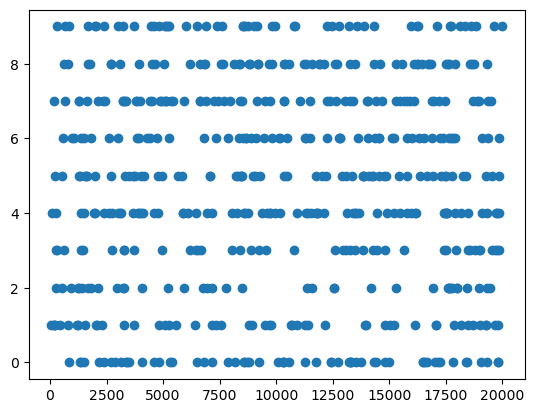

In [17]:
plt.scatter(spikes_df['timestamps'],spikes_df['node_ids'])
plt.show()